In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score


In [3]:
df = pd.read_csv("C:/Users/admin/Intern/DataSets/creditcard.csv")

# Use only numeric features for clustering (optional: use PCA later)
X = df[['V1', 'V2', 'V3', 'V4', 'V10', 'Amount']]  # Select subset


In [4]:
# Downsample majority class (non-fraud) to reduce dataset size
non_fraud = df[df['Class'] == 0].sample(n=5000, random_state=42)
fraud = df[df['Class'] == 1]
df_sampled = pd.concat([non_fraud, fraud])


In [6]:
# Redo scaling + PCA
X_sampled = df_sampled[['V1', 'V2', 'V3', 'V4', 'V10', 'Amount']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_sampled)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


In [8]:
dbscan = DBSCAN(eps=1.8, min_samples=5)
labels = dbscan.fit_predict(X_pca)

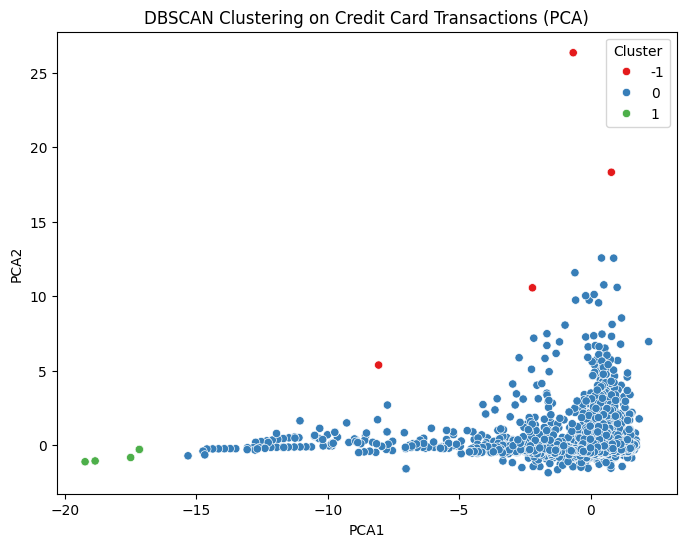

In [9]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels, palette='Set1')
plt.title('DBSCAN Clustering on Credit Card Transactions (PCA)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title="Cluster")
plt.show()
